In [ ]:
#1. How can you use "beer/name", "beer/style" and "review/text" as features to predict the overallrating of the beer ?


#Solution:



from google.colab import files 


uploaded = files.upload()
import io

Saving train.csv to train.csv


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objs as go
import plotly
import plotly.figure_factory as ff

In [ ]:
df = pd.read_csv(io.BytesIO(uploaded['train.csv'])) 
df.drop(['review/timeStruct','user/ageInSeconds','user/birthdayRaw','user/birthdayUnix','user/gender','index'], axis = 1,inplace = True)

df.head()

,beer/ABV,beer/beerId,beer/brewerId,beer/name,beer/style,review/appearance,review/aroma,review/overall,review/palate,review/taste,review/text,review/timeUnix,user/profileName
0,5.0,46634,14338,Chiostro,Herbed / Spiced Beer,4.0,4.0,4.0,4.0,4.0,Pours a clouded gold with a thin white head. N...,1229398690,RblWthACoz
1,11.0,3003,395,Bearded Pat's Barleywine,American Barleywine,4.0,3.5,3.5,3.5,3.0,12oz bottle into 8oz snifter.\t\tDeep ruby red...,1218238738,BeerSox
2,4.7,961,365,Naughty Nellie's Ale,American Pale Ale (APA),3.5,4.0,3.5,3.5,3.5,First enjoyed at the brewpub about 2 years ago...,1101492422,mschofield
3,4.4,429,1,Pilsner Urquell,Czech Pilsener,3.0,3.0,2.5,3.0,3.0,First thing I noticed after pouring from green...,1308532025,molegar76
4,4.4,4904,1417,Black Sheep Ale (Special),English Pale Ale,4.0,3.0,3.0,3.5,2.5,A: pours an amber with a one finger head but o...,1299912708,Brewbro000


In [ ]:
df.columns = ['beer_abv','beer_beerid','brewery_id','beer_name','beer_style','review_appearance','review_aroma','review_overall','review_palate','review_taste','review_text','review_time','review_profilename']
df = df.dropna()
df.head()

,beer_abv,beer_beerid,brewery_id,beer_name,beer_style,review_appearance,review_aroma,review_overall,review_palate,review_taste,review_text,review_time,review_profilename
0,5.0,46634,14338,Chiostro,Herbed / Spiced Beer,4.0,4.0,4.0,4.0,4.0,Pours a clouded gold with a thin white head. N...,1229398690,RblWthACoz
1,11.0,3003,395,Bearded Pat's Barleywine,American Barleywine,4.0,3.5,3.5,3.5,3.0,12oz bottle into 8oz snifter.\t\tDeep ruby red...,1218238738,BeerSox
2,4.7,961,365,Naughty Nellie's Ale,American Pale Ale (APA),3.5,4.0,3.5,3.5,3.5,First enjoyed at the brewpub about 2 years ago...,1101492422,mschofield
3,4.4,429,1,Pilsner Urquell,Czech Pilsener,3.0,3.0,2.5,3.0,3.0,First thing I noticed after pouring from green...,1308532025,molegar76
4,4.4,4904,1417,Black Sheep Ale (Special),English Pale Ale,4.0,3.0,3.0,3.5,2.5,A: pours an amber with a one finger head but o...,1299912708,Brewbro000


In [ ]:
print("Count of unique breweries, by brewery_id: " ,df.brewery_id.nunique())
print("Count of unique beers, by beer_id: " ,df.beer_beerid.nunique())
print("Count of unique beers, by beer_name: " ,df.beer_name.nunique())
print("Count of unique users, by review_profilename: " ,df.review_profilename.nunique())

Count of unique breweries, by brewery_id:  212
Count of unique beers, by beer_id:  1731
Count of unique beers, by beer_name:  1688
Count of unique users, by review_profilename:  7439


DATA CLEANING


In [ ]:
print("Overview of missing values in the dataset: /n",df.isnull().sum())
df=df.dropna()
print("After dropping the missing value",df.info())

Overview of missing values in the dataset: /n beer_abv              0
beer_beerid           0
brewery_id            0
beer_name             0
beer_style            0
review_appearance     0
review_aroma          0
review_overall        0
review_palate         0
review_taste          0
review_text           0
review_time           0
review_profilename    0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
Int64Index: 37485 entries, 0 to 37499
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   beer_abv            37485 non-null  float64
 1   beer_beerid         37485 non-null  int64  
 2   brewery_id          37485 non-null  int64  
 3   beer_name           37485 non-null  object 
 4   beer_style          37485 non-null  object 
 5   review_appearance   37485 non-null  float64
 6   review_aroma        37485 non-null  float64
 7   review_overall      37485 non-null  float64
 8   review_palate       37485

In [ ]:
#Remove the duplicate items
print("a user review the same beer more than one time, by beer_beerid: \n",df.loc[df.duplicated(['review_profilename','beer_beerid'],keep=False)][['review_profilename','beer_name','beer_beerid','review_overall']])

a user review the same beer more than one time, by beer_beerid: 
       review_profilename  ... review_overall
186           hopking311  ...            5.0
200           kojevergas  ...            2.0
233             spointon  ...            4.5
340          robwestcott  ...            3.5
359             adamette  ...            3.0
...                  ...  ...            ...
37290             argock  ...            4.5
37322        sweemzander  ...            4.0
37328         TheBear11D  ...            4.0
37409    objectivemonkey  ...            4.5
37452         letsgopens  ...            4.0

[581 rows x 4 columns]


In [ ]:
print("a user review the same beer more than one time, by beer_name: \n",df.loc[df.duplicated(['review_profilename','beer_name'],keep=False)][['review_profilename','beer_beerid','beer_name',"review_overall"]])

a user review the same beer more than one time, by beer_name: 
       review_profilename  ...  review_overall
186           hopking311  ...             5.0
200           kojevergas  ...             2.0
233             spointon  ...             4.5
340          robwestcott  ...             3.5
359             adamette  ...             3.0
...                  ...  ...             ...
37290             argock  ...             4.5
37322        sweemzander  ...             4.0
37328         TheBear11D  ...             4.0
37409    objectivemonkey  ...             4.5
37452         letsgopens  ...             4.0

[611 rows x 4 columns]


In [ ]:
df = df.sort_values("review_overall",ascending=False)
df = df.drop_duplicates(subset = ['review_profilename','beer_beerid'],keep='first')
df = df.drop_duplicates(subset = ['review_profilename','beer_name'],keep='first')

#User highest rating
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37175 entries, 28025 to 17707
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   beer_abv            37175 non-null  float64
 1   beer_beerid         37175 non-null  int64  
 2   brewery_id          37175 non-null  int64  
 3   beer_name           37175 non-null  object 
 4   beer_style          37175 non-null  object 
 5   review_appearance   37175 non-null  float64
 6   review_aroma        37175 non-null  float64
 7   review_overall      37175 non-null  float64
 8   review_palate       37175 non-null  float64
 9   review_taste        37175 non-null  float64
 10  review_text         37175 non-null  object 
 11  review_time         37175 non-null  int64  
 12  review_profilename  37175 non-null  object 
dtypes: float64(6), int64(3), object(4)
memory usage: 4.0+ MB


In [ ]:
#Outlier elimination
round(df.describe(),2)

,beer_abv,beer_beerid,brewery_id,review_appearance,review_aroma,review_overall,review_palate,review_taste,review_time
count,37175.00,37175.00,37175.00,37175.00,37175.00,37175.00,37175.00,37175.00,3.717500e+04
mean,7.40,21907.36,3045.79,3.90,3.87,3.89,3.85,3.92,1.232853e+09
std,2.32,18950.20,5132.54,0.59,0.68,0.70,0.67,0.72,7.187533e+07
min,0.10,175.00,1.00,0.00,1.00,0.00,1.00,1.00,9.262944e+08
25%,5.40,5441.00,395.00,3.50,3.50,3.50,3.50,3.50,1.189142e+09
50%,6.90,17538.00,1199.00,4.00,4.00,4.00,4.00,4.00,1.248233e+09
75%,9.40,34146.00,1381.00,4.50,4.50,4.50,4.50,4.50,1.291349e+09
max,57.70,77207.00,27797.00,5.00,5.00,5.00,5.00,5.00,1.326267e+09


In [ ]:
df = df.loc[(df.review_overall>=1) & (df.review_appearance>=1)]
round(df.describe(),2) #Outlier ratings not between 1-5 were eliminated

,beer_abv,beer_beerid,brewery_id,review_appearance,review_aroma,review_overall,review_palate,review_taste,review_time
count,37174.00,37174.00,37174.00,37174.00,37174.00,37174.00,37174.00,37174.00,3.717400e+04
mean,7.40,21907.84,3045.83,3.90,3.87,3.89,3.85,3.92,1.232858e+09
std,2.32,18950.22,5132.60,0.59,0.68,0.70,0.67,0.72,7.186862e+07
min,0.10,175.00,1.00,1.00,1.00,1.00,1.00,1.00,9.262944e+08
25%,5.40,5441.00,395.00,3.50,3.50,3.50,3.50,3.50,1.189153e+09
50%,6.90,17538.00,1199.00,4.00,4.00,4.00,4.00,4.00,1.248233e+09
75%,9.40,34146.00,1381.00,4.50,4.50,4.50,4.50,4.50,1.291350e+09
max,57.70,77207.00,27797.00,5.00,5.00,5.00,5.00,5.00,1.326267e+09


In [ ]:
df.review_time = pd.to_datetime (df.review_time,unit = 's')
df.dtypes

beer_abv                     float64
beer_beerid                    int64
brewery_id                     int64
beer_name                     object
beer_style                    object
review_appearance            float64
review_aroma                 float64
review_overall               float64
review_palate                float64
review_taste                 float64
review_text                   object
review_time           datetime64[ns]
review_profilename            object
dtype: object


Recommendation Analysis
Descriptive statistics


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f8e3acaa588>,
      dtype=object)

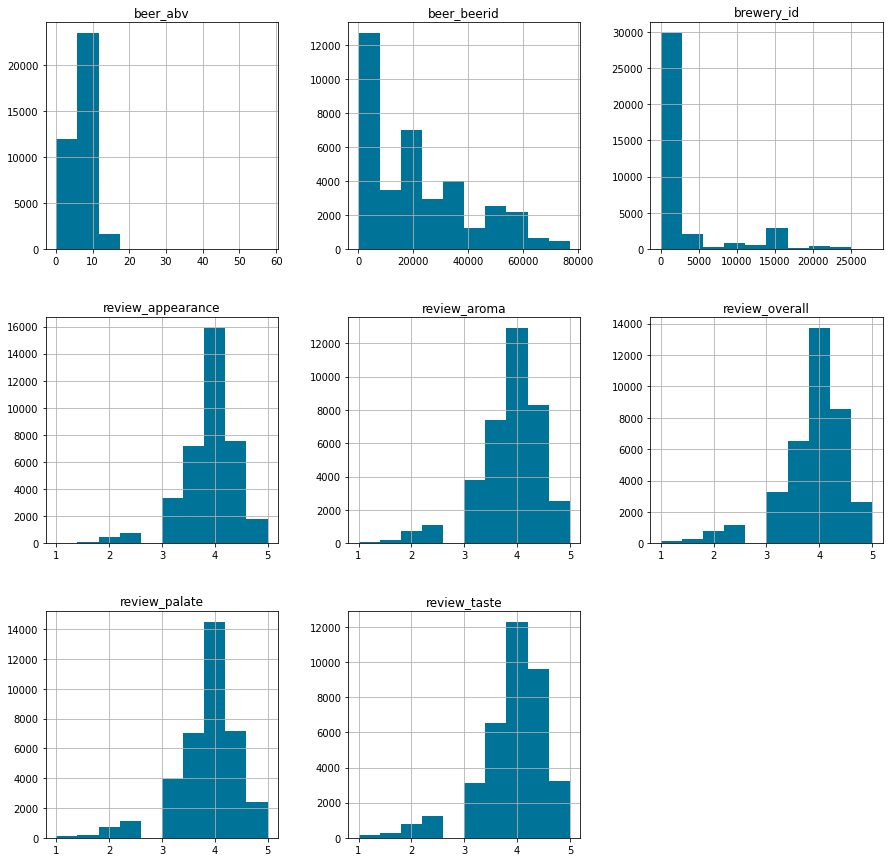

In [ ]:
df.hist(figsize=(15,15),color='#007399')

In [ ]:
bar3 = go.Bar(x=df.beer_name.value_counts().head(10).sort_values(ascending=True),
              y=df.beer_name.value_counts().head(10).sort_values(ascending=True).index,
              hoverinfo = 'x',
              text=df.beer_name.value_counts().head(10).sort_values(ascending=True).index,
              textposition = 'inside',
              orientation = 'h',
              opacity=0.75, 
              marker=dict(color='rgb(1, 77, 102)'))

layout = go.Layout(title='Top 10 popular beers',
                   xaxis=dict(title="Count of reviews",),
                   margin = dict(l = 220),
                   font=dict(family='Comic Sans MS',
                            color='dark gray'))

fig = go.Figure(data=bar3, layout=layout)

plotly.offline.iplot(fig)

In [ ]:
rate_beer = df[['beer_name','review_overall']].groupby('beer_name').agg('mean')

rate_beer = rate_beer.reset_index()

rate_beer
bar4 = go.Bar(x=rate_beer.sort_values(by="review_overall",ascending=False).head(10).sort_values(by="review_overall",ascending=True).review_overall,
              y=rate_beer.sort_values(by="review_overall",ascending=False).head(10).sort_values(by="review_overall",ascending=True).beer_name,
              hoverinfo = 'x',
              text=rate_beer.sort_values(by="review_overall",ascending=False).head(10).sort_values(by="review_overall",ascending=True).review_overall,
              textposition = 'inside',
              orientation = 'h',
              opacity=0.75, 
              marker=dict(color='rgb(1, 77, 102)'))

layout = go.Layout(title='Top 10 beers with highest rating',
                   xaxis=dict(title="Count of reviews",),
                   margin = dict(l = 220),
                   font=dict(family='Comic Sans MS',
                            color='dark gray'))

fig = go.Figure(data=bar4, layout=layout)

plotly.offline.iplot(fig)

In [ ]:
aa=list(rate_beer.sort_values(by="review_overall",ascending=False).head(10).sort_values(by="review_overall",ascending=True).beer_name)
df[df['beer_name'].isin(aa)].groupby("beer_name").agg("count").reset_index().beer_name.value_counts()

Centennial Pale Ale                  1
Bourbon Barrel Coffee Night Train    1
Farmhouse Ale                        1
Final Countdown                      1
Amarillo Single Hop Pale Ale         1
BourbonDog ESB                       1
Limping Mallard                      1
Calapooia Barleywine                 1
Quinn's Marathon Mild                1
Cauldron Brew                        1
Name: beer_name, dtype: int64

In [ ]:
bar5 = go.Bar(x=df.beer_style.value_counts().head(10).sort_values(ascending=True),
              y=df.beer_style.value_counts().head(10).sort_values(ascending=True).index,
              hoverinfo = 'x',
              text=df.beer_style.value_counts().head(10).sort_values(ascending=True).index,
              textposition = 'inside',
              orientation = 'h',
              opacity=0.75, 
              marker=dict(color='rgb(1, 77, 102)'))

layout = go.Layout(title='The Top 10 popular beers styles',
                   xaxis=dict(title="Count of reviews",),
                   margin = dict(l = 220),
                   font=dict(family='Comic Sans MS',
                            color='dark gray'))

fig = go.Figure(data=bar5, layout=layout)

# Plot it
plotly.offline.iplot(fig)

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



Text(0.5, 0, 'beer abv %')

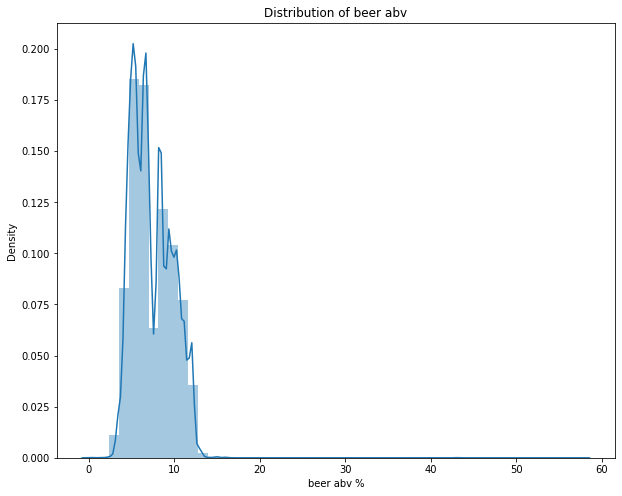

In [ ]:
plt.figure(figsize=(10,8))
plt.title("Distribution of beer abv")
sns.distplot(df.beer_abv)
plt.xlabel("beer abv %")

In [ ]:
print("Review count of each beer \n ",df.beer_name.value_counts().describe())

Review count of each beer 
  count    1688.000000
mean       22.022512
std        99.448214
min         1.000000
25%         1.000000
50%         2.000000
75%         7.000000
max      1849.000000
Name: beer_name, dtype: float64


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



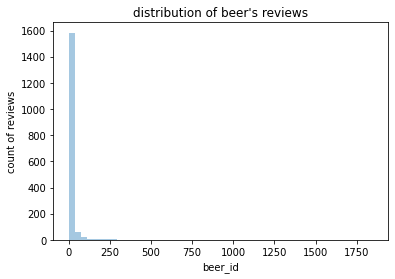

In [ ]:
sns.distplot(df.beer_beerid.value_counts(),kde=False)
plt.xlabel("beer_id")
plt.ylabel("count of reviews")
plt.title("distribution of beer's reviews")
plt.show()

In [ ]:
reshape=df[['review_overall','beer_name']].groupby("beer_name").agg(['count','mean'])
print("Beers with review_overall more than 4: \n",reshape[reshape['review_overall',  'mean']>4])
print("Beers with review_overall more than 4, and number of review less than 30: \n",reshape[reshape['review_overall',  'mean']>4][reshape[reshape['review_overall',  'mean']>4]['review_overall',  'count']<30])

Beers with review_overall more than 4: 
                                                    review_overall      
                                                            count  mean
beer_name                                                              
16 Year Anniversary Ale                                         2  4.50
1871 Lager                                                      2  4.25
2009 Arquebus, Ch. Boswell Barrel Finish With B...              1  4.50
60 Schilling Scottish Ale                                       1  4.50
80 Weight Mild Amber Scotch Ale                                 1  4.50
...                                                           ...   ...
Woodrow's Imperial Milk Stout                                   2  4.50
Wort Hog Dort                                                   2  4.25
XB                                                              2  4.50
Yes Sir! Senator! IPA                                           1  4.50
Yorkshire Porter       

In [ ]:
top10_breweries=df.beer_name.value_counts().head(10).reset_index()
top10_styles=df.beer_style.value_counts().head(10).reset_index()
subset = df[df['beer_name'].isin(top10_breweries['index'])& df['beer_style'].isin(top10_styles['index'])]

reshaped_subset = subset[['review_overall','beer_name']].groupby("beer_name").agg(['count','mean'])
reshaped_subset = reshaped_subset[reshaped_subset['review_overall',  'count']>30]
reshaped_subset.columns
reshaped_subset.sort_values(('review_overall',  'mean'),ascending=False).head(2)

review_overall          
                                                 count      mean
beer_name                                                       
Founders KBS (Kentucky Breakfast Stout)           1406  4.391892
Founders Breakfast Stout                          1849  4.364792

In [ ]:
categories=['review_overall','review_aroma', 'review_appearance', 'review_palate', 'review_taste']
r1=df[df.beer_name=="Founders CBS Imperial Stout"]
r2=df[df.beer_name=="Founders KBS (Kentucky Breakfast Stout)"]
r1_value=[r1.review_overall.mean(),r1.review_aroma.mean(),r1.review_appearance.mean(),r1.review_palate.mean(),r1.review_taste.mean()]
r2_value=[r2.review_overall.mean(),r2.review_aroma.mean(),r2.review_appearance.mean(),r2.review_palate.mean(),r2.review_taste.mean()]

mean_value=[df.review_overall.mean(),df.review_aroma.mean(),df.review_appearance.mean(),df.review_palate.mean(),df.review_taste.mean()]
fig = go.Figure()

fig.add_trace(go.Scatterpolar(
      r=r1_value,
      theta=categories,
      fill='toself',
      name='Founders CBS Imperial Stout'
))

fig.add_trace(go.Scatterpolar(
      r=mean_value,
      theta=categories,
      fill='toself',
      name='Overall_mean'
))

fig.update_layout(title="Radar chart of review features - Founders CBS Imperial Stout",
  polar=dict(
    radialaxis=dict(
      visible=True,
      range=[0, 5]
    )),
  showlegend=True
)

fig.show()

In [ ]:
fig = go.Figure()
fig.add_trace(go.Scatterpolar(
      r=r2_value,
      theta=categories,
      fill='toself',
      name='Founders KBS (Kentucky Breakfast Stout)'
))
fig.add_trace(go.Scatterpolar(
      r=mean_value,
      theta=categories,
      fill='toself',
      name='Overall_mean'
))
fig.update_layout(title="Radar chart of review features - Founders KBS (Kentucky Breakfast Stout)",
  polar=dict(
    radialaxis=dict(
      visible=True,
      range=[0, 5]
    )),
  showlegend=True
)

fig.show()

CORRELATION WITH REVIEW

In [ ]:
corr= df[["review_appearance","review_aroma","review_palate","review_taste", "review_overall"]].corr()
corr
x=list(corr.index)
y=list(corr.columns)

fig = ff.create_annotated_heatmap(x=x,y=y,z=corr.values.round(2),colorscale=[[0, 'navy'], [1, 'plum']],font_colors = ['white', 'black'])

fig.show()

In [ ]:
time=df["review_time"].groupby(df.review_time.dt.date).agg('count')
fig = go.Figure(data=go.Scatter(x=time.index, y=time.values))
fig.update_layout(title='The time-series line chart of reviews',
                   xaxis_title='Date',
                   yaxis_title='Count of reviews')
fig.show()

#Time series wrt reviews